In [1]:
# As seguintes librarias serão necessárias para resolver os exercícios
import numpy as np
import matplotlib.pyplot as plt

# Exercício 1

## Parte A

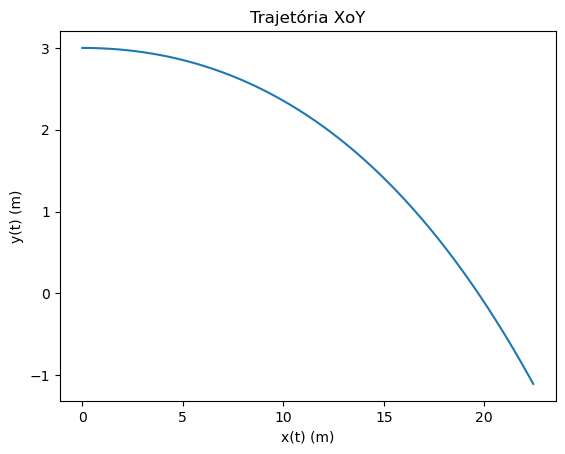

A bola interseta o plano da rede a 2.0369189627776976 metros de altura
A bola passa a rede
A bola bate no chão aos 19.69940314632491 metros
A bola não cai na área de serviço


In [2]:
# Valores dados 
g = 9.8
r = 0.034
m = 0.057
vT = 20

x0 = np.array([0, 3, 0])
v0 = np.array([30, 0, 0])

# Parâmetros
dt = 0.0001
t0 = 0
tf = 1

D = g/vT**2

# Esta função calcula a aceleração a partir da velocidade atual
def accel(v):
    vNorm = np.linalg.norm(v)
    # Cálculo da aceleração da resistência do ar
    aXRes = -D * vNorm * v[0]
    aYRes = -D * vNorm * v[1]
    aZRes = -D * vNorm * v[2]
    # Finalmente a aceleração é a soma da aceleração gravítica e da resistência do ar
    return np.array([aXRes, -g + aYRes, aZRes])

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)
# Agora lidamos com movimento tridimensional, logo precisamos de mais um
# elemento para os vetores das quantidades.
shape = (n + 1, 3)

t = np.zeros(n + 1)
x = np.zeros(shape)
v = np.zeros(shape)
a = np.zeros(shape)

# Insert initial values
a[0] = accel(v0)
v[0] = v0
t[0] = t0
x[0] = x0

for i in range(n):
    a[i + 1] = accel(v[i])
    v[i + 1] = v[i] + a[i] * dt
    x[i + 1] = x[i] + v[i] * dt
    t[i + 1] = t[i] + dt
    
plt.plot(x[:, 0], x[:, 1])
plt.xlabel("x(t) (m)")
plt.ylabel("y(t) (m)")
plt.title("Trajetória XoY")
plt.show()

for i in range(n):
  if x[i, 0] == 12 or (x[i, 0] - 12) * (x[i + 1, 0] - 12) < 0:
    idx = i
    break

yNet = x[idx,1]

# Resultado: A bola interseta o plano da rede a 2.0369189627776976 metros de altura
print(f"A bola interseta o plano da rede a {yNet} metros de altura")

if yNet >= 1:
    # Verdadeiro
    # Resultado: A bola passa rede
    print("A bola passa a rede")
else:
    # Não é executado
    print("A bola não passa a rede")

for i in range(n):
  if x[i, 1] == 0 or x[i, 1] * x[i + 1, 1] < 0:
    idx = i
    break

xGround = x[idx,0]

# Resultado: A bola bate no chão aos 19.69940314632491 metros
print(f"A bola bate no chão aos {xGround} metros")

if 12 <= xGround <= 18.4:
    # Falso
    # Não é executado
    print("A bola cai na área de serviço")
else:
    # Resultado: A bola não cai na área de serviço
    print("A bola não cai na área de serviço")

## Parte B

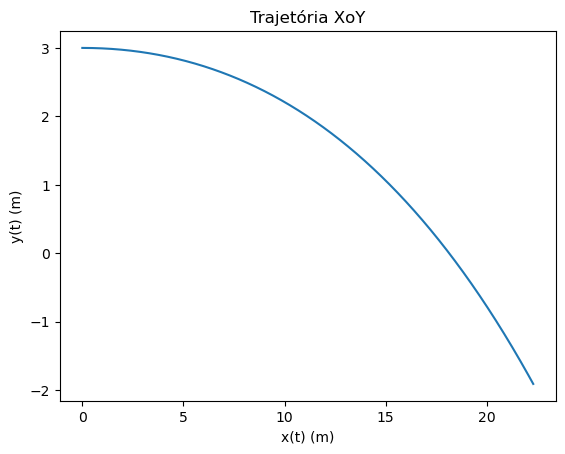

A bola interseta o plano da rede a 1.8225667073765657 metros de altura
A bola passa a rede
A bola bate no chão aos 18.141756043253 metros
A bola cai na área de serviço


In [3]:
# Valores dados 
g = 9.8
rho_ar = 1.225
r = 0.034
m = 0.057
vT = 20

x0 = np.array([0, 3, 0])
v0 = np.array([30, 0, 0])
w = np.array([0, 0, -60])

# Parâmetros
dt = 0.0001
t0 = 0
tf = 1

D = g/vT**2
A = np.pi * r**2

# Esta função calcula a aceleração a partir da rotação da bola e da velocidade atual
def accel(v):
    vNorm = np.linalg.norm(v)
    # Cálculo da aceleração da resistência do ar
    aXRes = -D * vNorm * v[0]
    aYRes = -D * vNorm * v[1]
    aZRes = -D * vNorm * v[2]
    
    # Cálculo da força de Magnus, np.cross calcula o produto
    # vetorial de dois vetores.
    F_magnus = 1/2 * A * rho_ar * r * np.cross(w, v)
    # Finalmente a aceleração é a soma da aceleração gravítica
    # e a soma da aceleração da força de Magnus
    return np.array([aXRes, -g + aYRes, aZRes]) + F_magnus/m

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)
# Agora lidamos com movimento tridimensional, logo precisamos de mais um
# elemento para os vetores das quantidades.
shape = (n + 1, 3)

t = np.zeros(n + 1)
x = np.zeros(shape)
v = np.zeros(shape)
a = np.zeros(shape)

# Insert initial values
a[0] = accel(v0)
v[0] = v0
t[0] = t0
x[0] = x0

for i in range(n):
    a[i + 1] = accel(v[i])
    v[i + 1] = v[i] + a[i] * dt
    x[i + 1] = x[i] + v[i] * dt
    t[i + 1] = t[i] + dt
    
plt.plot(x[:, 0], x[:, 1])
plt.xlabel("x(t) (m)")
plt.ylabel("y(t) (m)")
plt.title("Trajetória XoY")
plt.show()

for i in range(n):
  if x[i, 0] == 12 or (x[i, 0] - 12) * (x[i + 1, 0] - 12) < 0:
    idx = i
    break

yNet = x[idx,1]

# Resultado: A bola interseta o plano da rede a 1.8225667073765657 metros de altura
print(f"A bola interseta o plano da rede a {yNet} metros de altura")

if yNet >= 1:
    # Verdadeiro
    # Resultado: A bola passa rede
    print("A bola passa a rede")
else:
    # Não é executado
    print("A bola não passa a rede")

for i in range(n):
  if x[i, 1] == 0 or x[i, 1] * x[i + 1, 1] < 0:
    idx = i
    break

xGround = x[idx,0]

# Resultado: A bola bate no chão aos 18.141756043253 metros
print(f"A bola bate no chão aos {xGround} metros")

if 12 <= xGround <= 18.4:
    # Verdadeiro
    # Resultado: A bola cai na área de serviço
    print("A bola cai na área de serviço")
else:
    # Não é executado
    print("A bola não cai na área de serviço")

# Exercício 2

In [4]:
# Valores dados 
g = 9.8 # Aceleração gravítica na terra

mu = 0.04 # Coeficiente de resistência do alcatrão
rho_ar = 1.225 # Densidade do ar
A = 2 # Área frontal do carro
m = 2000 # Massa do carr0
C_res = 0.25 # Coeficiente de resistência do ar

potencia = 40_000

x0 = 0
v0 = 1

# Parâmetros
dt = 0.001
t0 = 0
tf = 200

# Inclinação em radianos
incl = np.radians(5)

# Esta função calcula a aceleração a partir da velocidade atual do carro
def accel(v):
    # Aceleração pela potência do carro
    accel_p = potencia/(m * v)
    # Aceleração pela resistência do ar
    accel_res = -C_res/(2*m) * A * rho_ar * v**2
    # Aceleração pelo atrito
    accel_atrito = - (mu * np.cos(incl) * g)/m
    # Aceleração pelo peso
    accel_peso = - np.sin(incl) * g
    # Aceleração total
    return accel_p + accel_res + accel_atrito + accel_peso

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)

t = np.zeros(n + 1)
x = np.zeros(n + 1)
v = np.zeros(n + 1)
a = np.zeros(n + 1)

# Valores iniciais
a[0] = accel(v0)
v[0] = v0
x[0] = x0
t[0] = t0

for i in range(n):
    a[i + 1] = accel(v[i])
    v[i + 1] = v[i] + a[i] * dt
    x[i + 1] = x[i] + v[i] * dt
    t[i + 1] = t[i] + dt

## Parte A

Evolução temporal da posição e velocidade em gráficos

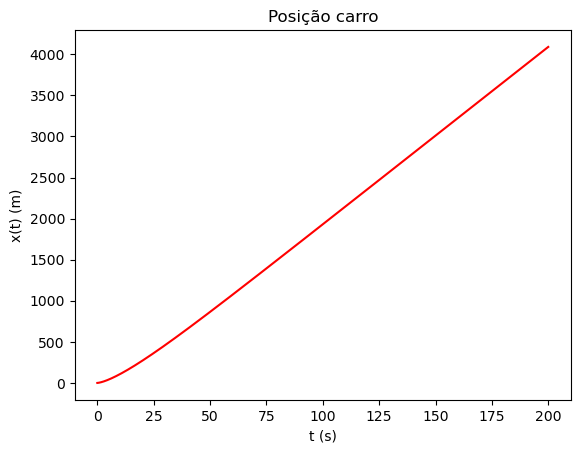

In [5]:
plt.plot(t, x, "r", label="Posição")
plt.xlabel("t (s)")
plt.ylabel("x(t) (m)")
plt.title("Posição carro")
plt.show()

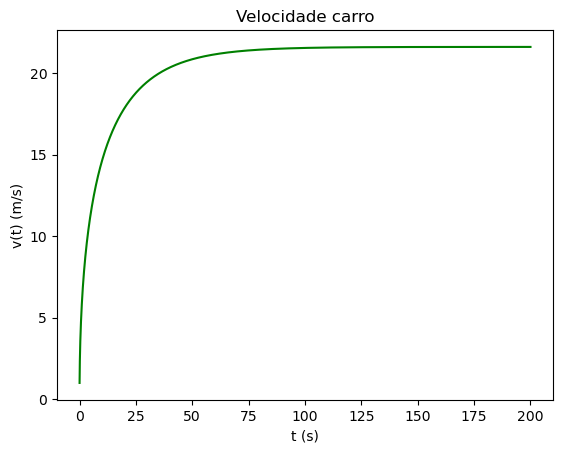

In [6]:
plt.plot(t, v, "g", label="Velocidade")
plt.xlabel("t (s)")
plt.ylabel("v(t) (m/s)")
plt.title("Velocidade carro")
plt.show()

## Parte B

Tempo que leva a subir 2km

In [7]:
for i in range(n):
  # Procurar os zeros com a posição modificada
  if x[i] == 2000 or (x[i] - 2000) * (x[i + 1] - 2000) < 0:
    idx = i
    break

x2000 = x[idx]
t2000 = t[idx]

# Resultado: O carro atinge os 2km (≈ 1999.9903203232327) aos 103.2180000001288 segundos
print(f"O carro atinge os 2km (≈ {x2000}) aos {t2000} segundos")

O carro atinge os 2km (≈ 1999.9903203232327) aos 103.2180000001288 segundos


## Parte C

O trabalho feito pelo motor nesta viagem.

O trabalho pode ser obtido como a variação cinética entre o ponto inicial e final.

In [8]:
v2000 = v[idx]
v0 = v[0]

E_c0 = 1/2 * m * v0**2
E_c1 = 1/2 * m * v2000**2

diff_E_c = E_c1 - E_c0

# Resultado: O trabalho feito pelo motor do carro foi de 463418.3486216352
print(f"O trabalho feito pelo motor do carro foi de {diff_E_c}")

O trabalho feito pelo motor do carro foi de 463418.3486216352


## Parte D

In [9]:
# Valores dados 
g = 9.8 # Aceleração gravítica na terra

mu = 0.04 # Coeficiente de resistência do alcatrão
rho_ar = 1.225 # Densidade do ar
A = 2 # Área frontal do carro
m = 2000 # Massa do carro
C_res = 0.25 # Coeficiente de resistência do ar

potencia = -30_000

x0 = 0
v0 = 20

# Parâmetros
dt = 0.001
t0 = 0
tf = 200

# Inclinação em radianos
incl = np.radians(5)

# Esta função calcula a aceleração a partir da velocidade atual do carro
def accel(v):
    # Aceleração pela potência do carro
    accel_p = potencia/(m * v)
    # Aceleração pela resistência do ar
    accel_res = -C_res/(2*m) * A * rho_ar * np.abs(v) * v
    # Aceleração pelo atrito
    accel_atrito = - (mu * np.cos(incl) * g * np.abs(v)/v)/m
    # Aceleração pelo peso
    accel_peso = np.sin(incl) * g
    # Aceleração total
    return accel_p + accel_res + accel_atrito + accel_peso

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)

t = np.zeros(n + 1)
x = np.zeros(n + 1)
v = np.zeros(n + 1)
a = np.zeros(n + 1)

# Valores iniciais
a[0] = accel(v0)
v[0] = v0
x[0] = x0
t[0] = t0

for i in range(n):
    a[i + 1] = accel(v[i])
    v[i + 1] = v[i] + a[i] * dt
    x[i + 1] = x[i] + v[i] * dt
    t[i + 1] = t[i] + dt

### Parte D.a

Evolução temporal da posição e velocidade em gráficos.

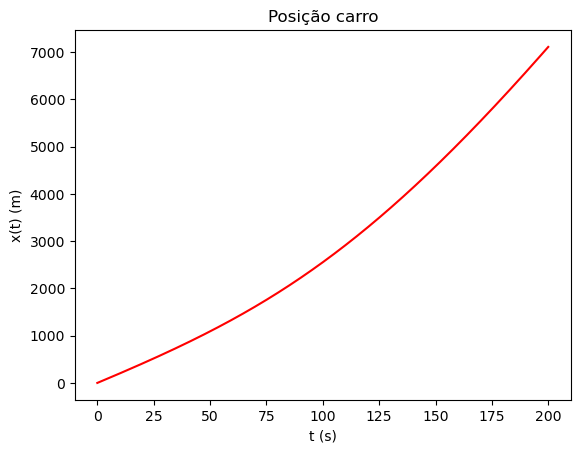

In [10]:
plt.plot(t, x, "r", label="Posição")
plt.xlabel("t (s)")
plt.ylabel("x(t) (m)")
plt.title("Posição carro")
plt.show()

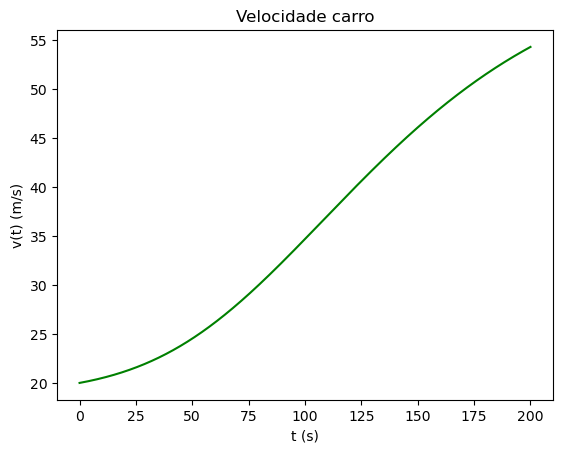

In [11]:
plt.plot(t, v, "g", label="Velocidade")
plt.xlabel("t (s)")
plt.ylabel("v(t) (m/s)")
plt.title("Velocidade carro")
plt.show()

### Parte D.b

Tempo que leva a descer 2km.

In [12]:
for i in range(n):
  # Procurar os zeros com a posição modificada
  if x[i] == 2000 or (x[i] - 2000) * (x[i + 1] - 2000) < 0:
    idx = i
    break

x2000 = x[idx]
t2000 = t[idx]

# Resultado: O carro atinge os 2km (≈ 1999.977692641462) aos 83.10800000003277 segundos
print(f"O carro atinge os 2km (≈ {x2000}) aos {t2000} segundos")

O carro atinge os 2km (≈ 1999.977692641462) aos 83.10800000003277 segundos


### Parte D.c

O trabalho feito pelo motor nesta viagem.

O trabalho pode ser obtido como a variação cinética entre o ponto inicial e final.

In [13]:
v2000 = v[idx]
v0 = v[0]

E_c0 = 1/2 * m * v0**2
E_c1 = 1/2 * m * v2000**2

diff_E_c = E_c1 - E_c0

# Resultado: O trabalho feito pelo motor do carro foi de 548909.275743847
print(f"O trabalho feito pelo motor do carro foi de {diff_E_c}")

O trabalho feito pelo motor do carro foi de 548909.275743847


## Parte E

A diferença da bateria na subida e na descida

In [14]:
W_subir = 463418.3486216352
Bat_restorado = diff_E_c/2
Bat_diff = Bat_restorado - W_subir

# Resultado: A diferença na bateria foi de -188963.71074971167
print(f"A diferença na bateria foi de {Bat_diff}")

A diferença na bateria foi de -188963.71074971167
